In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import AdaBoostClassifier

## Import Dataset

In [2]:
df_pen = sns.load_dataset('penguins')

In [3]:
df_pen = df_pen.dropna()

In [4]:
df_pen = df_pen.sample(frac=1).reset_index(drop=True)

In [5]:
X = df_pen.drop(['species'], axis = 1)
y = df_pen['species']

## Data Pre-processing

In [6]:
categorical_x = ['island', 'sex']
numerical_x = X.drop(categorical_x, axis = 1).columns

In [7]:
# ## If y is categorical:
# y.fillna(y.mode(), inplace= True)
# ##If y is numerical
# # y.fillna(y.mean(), inplace= True)
# for i in numerical_x:
#     X[i].fillna(X[i].mean(), inplace = True)

# for i in categorical_x:
#     X[i].fillna(X[i].mode().iloc[0], inplace = True)
    
categoricas = pd.get_dummies(X[categorical_x], drop_first=True)
X = pd.concat([categoricas, X[numerical_x]], axis = 1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state=101)

In [9]:
escalador = StandardScaler()
escalador.fit(X_train)

X_train = escalador.transform(X_train)
X_test = escalador.transform(X_test)

## Model implementation

In [10]:
model = AdaBoostClassifier()

In [11]:
model.fit(X_train,y_train)

AdaBoostClassifier()

In [12]:
base_pred = model.predict(X_test)

## Evaluation

In [13]:
y_pred = model.predict(X_test)

In [14]:
metrics.accuracy_score(y_test,y_pred)

0.72

In [15]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  1,  0],
       [12,  0,  0],
       [ 1,  0, 17]], dtype=int64)

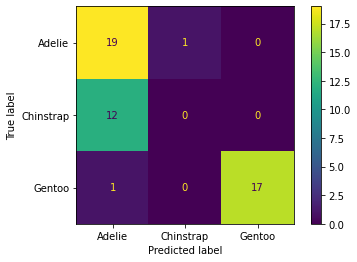

In [16]:
metrics.plot_confusion_matrix(model, X_test,y_test)

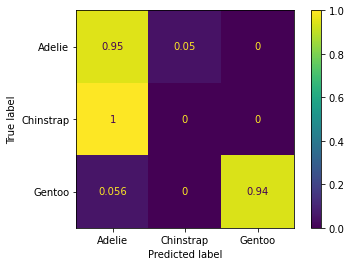

In [17]:
metrics.plot_confusion_matrix(model, X_test,y_test,normalize='true')

In [18]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.59      0.95      0.73        20
   Chinstrap       0.00      0.00      0.00        12
      Gentoo       1.00      0.94      0.97        18

    accuracy                           0.72        50
   macro avg       0.53      0.63      0.57        50
weighted avg       0.60      0.72      0.64        50



In [19]:
model.feature_importances_

array([0.  , 0.  , 0.  , 0.  , 0.5 , 0.32, 0.18])

In [20]:
df_feature_importance = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_depth_mm,0.50
flipper_length_mm,0.32
body_mass_g,0.18
island_Dream,0.00
island_Torgersen,0.00
sex_Male,0.00
bill_length_mm,0.00


## Grid Search

In [21]:
model = AdaBoostClassifier()

In [22]:
n_estimators = [15,20,25,30,35]
learning_rate = [1]

parametros = {'n_estimators':n_estimators,
              'learning_rate':learning_rate,}

In [23]:
grid_model = GridSearchCV(model,param_grid= parametros, cv = 5, scoring='accuracy', n_jobs=-1)

In [24]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1],
                         'n_estimators': [15, 20, 25, 30, 35]},
             scoring='accuracy')

In [25]:
grid_model.best_params_

{'learning_rate': 1, 'n_estimators': 15}

In [26]:
y_pred = grid_model.predict(X_test)

### Evaluation

In [27]:
metrics.accuracy_score(y_test,y_pred)

0.72

In [28]:
metrics.confusion_matrix(y_test,y_pred)

array([[19,  1,  0],
       [12,  0,  0],
       [ 1,  0, 17]], dtype=int64)

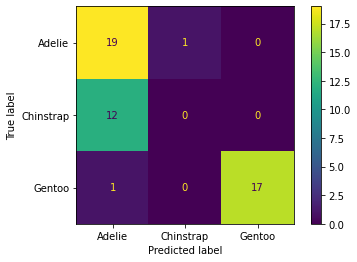

In [29]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test)

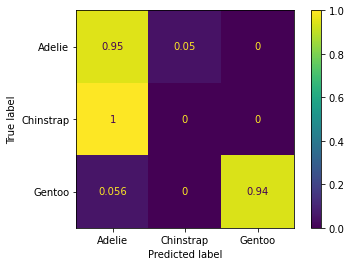

In [30]:
metrics.plot_confusion_matrix(grid_model, X_test,y_test,normalize='true')

In [31]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Adelie       0.59      0.95      0.73        20
   Chinstrap       0.00      0.00      0.00        12
      Gentoo       1.00      0.94      0.97        18

    accuracy                           0.72        50
   macro avg       0.53      0.63      0.57        50
weighted avg       0.60      0.72      0.64        50



In [32]:
grid_model.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.46666667,
       0.33333333, 0.2       ])

In [33]:
df_feature_importance = pd.DataFrame(index=X.columns,data=grid_model.best_estimator_.feature_importances_,columns=['Feature Importance'])
df_feature_importance = df_feature_importance.sort_values('Feature Importance', ascending = False)
df_feature_importance

,Feature Importance
bill_depth_mm,0.466667
flipper_length_mm,0.333333
body_mass_g,0.200000
island_Dream,0.000000
island_Torgersen,0.000000
sex_Male,0.000000
bill_length_mm,0.000000


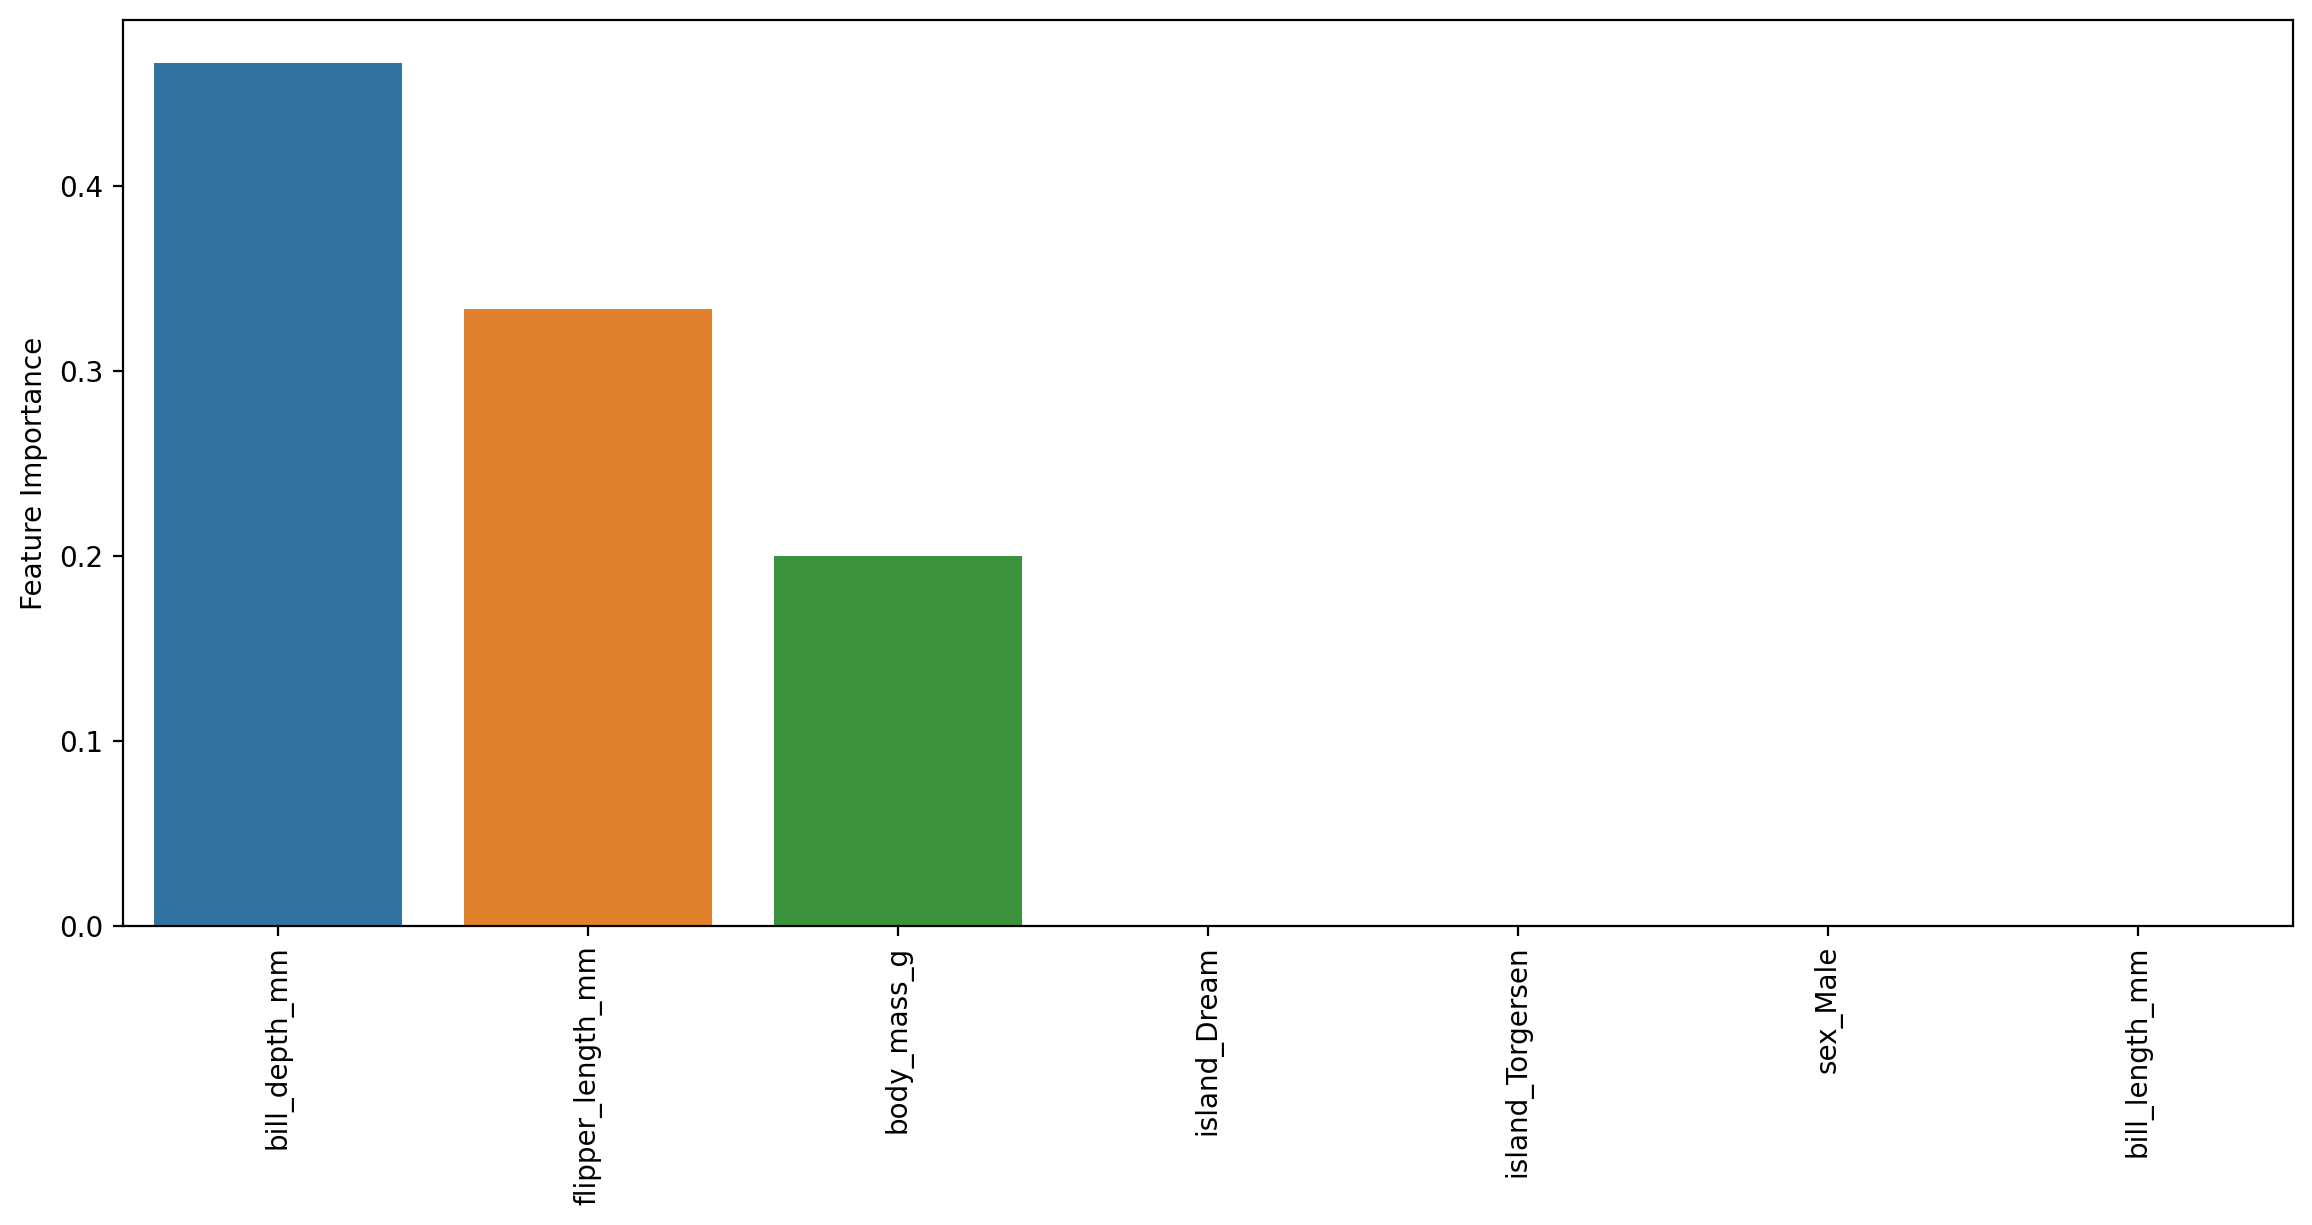

In [34]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = df_feature_importance,x=df_feature_importance.index,y='Feature Importance')

plt.xticks(rotation=90);

## Elbow

In [35]:
errors = []
misclassifications = []

for n in range(1,64):
    rfc = AdaBoostClassifier( n_estimators=n,)
    rfc.fit(X_train,y_train)
    preds = rfc.predict(X_test)
    err = 1 - metrics.accuracy_score(preds,y_test)
    n_missed = np.sum(preds != y_test) # watch the video to understand this line!!
    errors.append(err)
    misclassifications.append(n_missed)

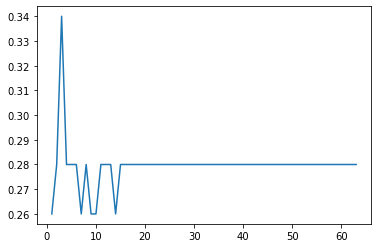

In [36]:
plt.plot(range(1,64),errors)

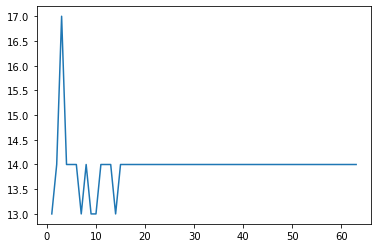

In [37]:
plt.plot(range(1,64),misclassifications)